In [1]:
#%matplotlib nbagg
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Poiseuille's method for determining viscosity

The  volume flow rate, ${\displaystyle\frac{{\rm d}V}{{\rm d}t}}$, of fluid flowing smoothly through a horizontal tube of length $L$ and radius $r$ is given by Poiseuille's equation:
\begin{equation}
\frac{{\rm d}V}{{\rm d}t}=\frac{\pi\rho g h r^4}{8\eta L},
\end{equation}
where $\eta$ and $\rho$ are the viscosity and density, respectively, of the fluid,  $h$ is the head of pressure across the tube, and $g$ the acceleration due to gravity. 
<bf>
In an experiment the graph of the flow rate versus height has a slope measured to 7%, the length is known to 0.5%, and the radius to 8%.  
<bf>
Required:
<bf>
<blockquote>
(i) What is the fractional precision to which the viscosity is known? 
<bf>
<bf>
(ii) If more experimental time is available, should this be devoted to 
>(a) collecting more flow-rate data, 
<bf>
>(b) measuring the length,  
<bf>
>(c) the radius of the tube?

### (i) What is the fractional precision to which the viscosity is known? Express your answer as a DECIMAL. 

In [2]:
def one_i():
    'Returns fractional precision of viscosity'
    
    fractional_precision = np.sqrt((16*0.08**2)+(0.07**2)+(0.005**2))
    percentage_error = fractional_precision*100
    
    return fractional_precision
one_i()

0.32760494501762333

### (ii) If more experimental time is available, should this be devoted to 
>(a) collecting more flow-rate data, 
<bf>
>(b) measuring the length,  
<bf>
>(c) the radius of the tube?

In [3]:
def one_ii():
    '''Your function should return a string of A,B or C'''

    comment = 'C'

    return comment
one_ii()

'C'

## Question 2: Functional error approach for Van der Waals calculation

The Van der Waals equation of state is a correction to the ideal gas law, given by the equation,

\begin{equation}
(P+\frac{a}{V_m^2})(V_m-b) = RT,
\end{equation}

where $P$ is the pressure, $V_m$ is the molar volume, $T$ is the absolute temperature, $R$ is the universal gas constant with $a$ and $b$ being species-specific Van der Waals coefficents. 

A sample of Nitrogen was measured in an experiment as,
<bf>
>Molar Volume $V_m$ = $(2.000 \pm 0.003)$x$10^{-4}m^3mol^{-1}$
<bf>
>Absolute Temperature $T$ = $298.0\pm0.2K$

and the constants are,
<blockquote>
<bf> 
$a$ = $(1.408$x$10^{-1}) m^6mol^{-2}Pa$
<bf>
$b$ = $(3.913$x$10^{-5}) m^3mol^{-1}$
<bf>
$R$ = $(8.3145) JK^{-1}mol^{-1}$
<bf>
</blockquote>
Required:
<bf>
>(i) From the given data, calculate the pressure giving your answer in MPa.
<bf>
>(ii) Calculate the uncertainty in the pressure by using the functional approach for error propagation.
<bf>
>(iii) Repeat the calculations above for 
>>$V_m = (2.000\pm0.003)\times10^{-3}\,{\rm m}^{3}\,{\rm mol}^{-1}$ and  $T=400.0 \pm 0.2K$.

### (i) From the given data, calculate the pressure giving your answer in MPa.

In [4]:
def two_i():
    '''Your function should return the pressure in MPa'''

    R = 8.3145
    T,alpha_t = 298,0.2
    v_m,alpha_vm = 2*10**-4,0.003*10**-4
    b = 3.913*10**-5
    a = 1.408*10**-1
    # Note: the answer is divided by 10**6 in order to have the correct units
    pressure = (((R*T)/(v_m-b))-(a/(v_m**2)))/10**6
    return pressure
two_i()

11.882007832411261

### (ii) Calculate the uncertainty in the pressure by using the functional approach for error propagation.

In [5]:
def two_ii():
    '''Your function should return the uncertainty'''

    R = 8.3145
    T,alpha_t = 298,0.2
    v_m,alpha_vm = 2*10**-4,0.003*10**-4
    b = 3.913*10**-5
    a = 1.408*10**-1
    pressure = two_i()*10**6 # pressure is not in Pascals
    
    alpha_v= ((R*T)/((v_m+alpha_vm)-b))-(a/((v_m+alpha_vm)**2))-pressure
    alpha_t = ((R*(T+alpha_t))/(v_m-b))-(a/(v_m**2))-pressure
    uncertainty = (np.sqrt((alpha_v**2)+(alpha_t**2)))/10**6
    
    return uncertainty
two_ii()

0.020872267575327286

### (iii) Repeat the calculations above for 
>$V_m = (2.000\pm0.003)\times10^{-3}\,{\rm m}^{3}\,{\rm mol}^{-1}$ and  $T=400.0 \pm 0.2K$.

In [6]:
def two_iii():
    '''Your function should return both the pressure and the uncertainty'''
    pressure_2 = 0
    uncertainty_2 = 0

    R = 8.3145
    T,alpha_t = 400,0.2
    v_m,alpha_vm = 2*10**-3,0.003*10**-3
    b = 3.913*10**-5
    a = 1.408*10**-1
    
    pressure_2 = (((R*T)/(v_m-b))-(a/(v_m**2)))
    alpha_v= ((R*T)/((v_m+alpha_vm)-b))-(a/((v_m+alpha_vm)**2))-pressure_2
    alpha_t = ((R*(T+alpha_t))/(v_m-b))-(a/(v_m**2))-pressure_2
    uncertainty_2 = (np.sqrt((alpha_v**2)+(alpha_t**2)))/1000000
    pressure_2 = pressure_2/10**6
    
    return pressure_2,uncertainty_2
two_iii()

(1.6608838811343944, 0.0026262566498485803)

## Question 3: Reverse Engineering the Incredible Goal
The separation of the posts is 7.32m, and the ball is struck from a point 22m from the near post and 29m from the far post.

Required:

> (i) Plot a graph of $\alpha_\theta$ on the y-axis vs $\alpha_L$ on the x-axis for the range of values presented in the `alpha_ls` array.
<bf>
>(ii) To what (common) precision must these three lengths be known to justify quoting the angle to 11 significant figures? 

*[Hint: use the functional approach using the values for the errors in the length measurements as the provided `alpha_ls` array]*

### (i) Plot a graph of $\alpha_\theta$ on the y-axis vs $\alpha_L$ on the x-axis for the range of values presented in the `alpha_ls` array.

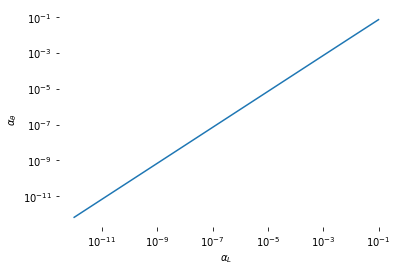

[0.0682737894907993,
 0.006893712190569904,
 0.0006909666270784932,
 6.911354959072456e-05,
 6.911524764450953e-06,
 6.911541761459788e-07,
 6.911543545864887e-08,
 6.911543908119496e-09,
 6.911537960476881e-10,
 6.911445931209346e-11,
 6.911834081855536e-12,
 6.901662722453525e-13]

In [7]:
def three_i():
    '''Your function should plot the graph and return the alpha_thetas array.'''
    
    a = 22
    b = 29
    c = 7.32
    alpha_ls = [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12]
    alpha_thetas = []
    
    # Cosine rule
    theta_rad = np.arccos(((b**2)+(c**2)-(a**2))/(2*b*c))

    for i in alpha_ls:
        error = i
        # Perform the functional approach
        alpha_az = np.arccos(((b**2)+(c**2)-((a+error)**2))/(2*b*c))-theta_rad
        alpha_bz = np.arccos((((b+error)**2)+(c**2)-(a**2))/(2*(b+error)*c))-theta_rad
        alpha_cz = np.arccos(((b**2)+((c+error)**2)-(a**2))/(2*b*(c+error)))-theta_rad
        alpha_theta = np.sqrt(((alpha_az)**2)+((alpha_bz)**2)+((alpha_cz)**2))
        alpha_thetas.append(alpha_theta)
    plt.plot(alpha_ls,alpha_thetas)
    
    #Plot on a log scale
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r'$\alpha_L$')
    plt.ylabel(r'$\alpha_\theta$')
    plt.box(on=None) 
    
    plt.show()

    return alpha_thetas
three_i()

### (ii) To what (common) precision must these three lengths be known to justify quoting the angle to 11 significant figures?

For the angle to be quoted to 11 significant figures, the error must be in the 10th decimal place (since the angle is in radians and we are assuming the angle to be >1 radian). This is the case first when the error in the angle is 7x$10^{-10}$, which corresponds to a common precision in the lenghts of $10^{-9}$. If the angle were <1 radian then the precision would be $10^{-10}$.

## Question 4: Linear Regression/Weighted Fit

The data  plotted in Fig 6.1(d) relating to the degradation of the signal to noise ratio from a frequency to voltage converter near harmonics of the mains frequency are listed below.
\begin{equation}
\begin{array}{lcccccc}
\hline
{\rm frequency~(Hz)} &10&20&30&40&50&60\\
{\rm voltage~(mV)} &16&45&64&75&70&115\\
{\rm error~(mV)}   &5&5&5&5&30&5\\
\hline
{\rm frequency~(Hz)} &70&80&90&100&110&\\
{\rm voltage~(mV)} &142&167&183&160&221&\\
{\rm error~(mV)}   &5&5&5&30&5&\\
\hline
\end{array} 
\end{equation}

This data is also contained in the file 'linear_regression.csv'.

Required: 
<bf>
> (i) Calculate the best-fit gradient and intercept and associated errors using a weighted fit. You may use the `curve_fit` function.

In [8]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]

def f(frequencies, a,b):
    return a*frequencies+b

def best_fit_params():
    '''Your function should return the gradient,gradient_error,intercept,intercept_error'''
    gradient = 0
    gradient_error = 0
    intercept = 0
    intercept_error = 0

    # Using the curve_fit function
    popt, pcov = curve_fit(f, frequencies, voltages, sigma = voltage_errors)
    perr = np.sqrt(np.diag(pcov))
    gradient = popt[0]
    gradient_error = perr[0]
    intercept = popt[1]
    intercept_error = perr[1]

    return(gradient,gradient_error,intercept,intercept_error)

best_fit_params()

FileNotFoundError: File b'linear_regression.csv' does not exist

## Question 5: Error bars from a $\chi^2$ minimisation
|--|Unweighted | Weighted |
| --- | --- | --- |
| Gradient | (1.9$\pm$0.2)mV/Hz | (2.03$\pm$0.05)mV/Hz |
| Intercept | (0$\pm$1)x10mV | (-1$\pm$3)mV |

Required:
<bf>
>(i) For the data set of the previous question, write your own code to perform a $\chi^2$ minimisation. You may use the `mininmize` function, but not the `curve_fit` function.
<bf>
>(ii) Verify that $\chi^{2}_{\rm{min}}$ is obtained for the same values of the parameters as are listed in the table above. 
<bf>
>(iii) By following the procedure of $\chi^2\rightarrow\chi^2_{\rm min}+1$ outlined in Section 6.5 in Hughes and Hase and the figure above, check that the error bars for $m$ and $c$ are in agreement with the table above.  Include explicitly the first 5 steps of the procedure shown in the figure above for the calculation of the slope.

### (i) For the data set of the previous question, write code to perform a $\chi^2$ minimisation.

In [9]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]
# Note: it is useful to normalise the data in order to help avoid a large
# dependence on the initial starting position
voltages = voltages
voltage_errors = voltage_errors

def chisqfunc(x):
    'Linear chi squared fitting function'
    a,b = x
    model = a + b*frequencies
    chisq = np.sum(((voltages - model)/voltage_errors)**2)
    return chisq

# Set starting position from which to minimize
x0 = np.array([0,0])

# Use scipy.optimize.minimize
result =  minimize(chisqfunc, x0)
a,b=result.x

# Good practice to plot graph to show the fit to check its quality
plt.errorbar(frequencies,voltages, label = 'data', yerr=voltage_errors,fmt='o',capsize=2.5)
plt.plot(frequencies,a+b*frequencies, label = 'chi squared fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

print ('The gradient is {} mV/Hz and the intecept is {} mV'.format(b,a))

FileNotFoundError: File b'linear_regression.csv' does not exist

Note: the fit is good and the only points further away from the line are the two with very large error bars.

### (ii) Verify that $\chi^{2}_{\rm{min}}$ is obtained for the same values of the parameters as are listed in the table above. 

In [10]:
data = pd.read_csv('linear_regression.csv')

def five_ii(): 
    '''Your function must return the gradient and intercept'''
    
    gradient = b
    intercept = a
    
    return gradient,intercept 
five_ii()

FileNotFoundError: File b'linear_regression.csv' does not exist

### (iii) By following the procedure of $\chi^2\rightarrow\chi^2_{\rm min}+1$ outlined in Section 6.5 in Hughes and Hase and the figure above, check that the error bars for $m$ and $c$ are in agreement with the table above.  Include explicitly the first 5 steps of the procedure shown in the figure above for the calculation of the slope.

In [11]:
def search(precision, z_min, f_min):

    z_new = z_min
    f_new = f_min
    m_stop = 0
    c_stop = 0
    while(m_stop == 0 or c_stop == 0):
        m_stop = 1
        c_stop = 1
        
        # There are more optimal ways than doing a while(1) function but this suffices for this solution
        while (1):
            # changing gradient
            z_new[1] = z_new[1] + (1 / precision)

            f_new = chisqfunc(z_new)
                
            if (f_new - f_min) >= 1 :
                z_new[1] = z_new[1] - (1 / precision)
                break;
            else :
                m_stop = 0
        
        while (1):
            # changing intercept
            z_new[0] = z_new[0] - (1 / precision)

            f_new = chisqfunc(z_new)
                
            if (f_new - f_min) >= 1 :
                z_new[0] = z_new[0] + (1 / precision)
                break;
            else:
                c_stop = 0
                
    return z_new

def five_iii():
    '''
    Adapted from one of the submitted homework solutions - thank you to whoever did this
    The function has been adapted to make it slightly more efficient but I liked the custom search function
    '''
    error_m = 0
    error_c = 0
    
    x0 = [0,0]
    result_weight = minimize(chisqfunc, x0)
    
    precision = 1000
    result_shift_weight = search(1000, result_weight.x, result_weight.fun)
    
    result_weight = minimize(chisqfunc, x0)
    
    error_m_weight = round(abs(result_shift_weight[1] - result_weight.x[1]), 2)
    error_c_weight = round(abs(result_shift_weight[0] - result_weight.x[0]), 0)
    
    error_m = error_m_weight
    error_c = error_c_weight
    
    return error_m, error_c

five_iii()

NameError: name 'chisqfunc' is not defined

## Question 6- Strategies for error bars

\begin{equation}
\begin{array}{lccccc}
\hline
x &1&2&3&4&5\\
y &51&103&150&199&251\\
\alpha_{y}   &1&1&2&2&3\\
\hline
x &6&7&8&9&10\\
y &303&347&398&452&512\\
\alpha_{y}   &3&4&5&6&7\\
\hline
\end{array} 
\end{equation}

Required:
<bf>
>(i) Calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<bf>
>(ii) If the data set had been homoscedastic, with all the errors equal, $\alpha_{y}=4$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<bf>
>(iii) If the experimenter took greater time to collect the first and last data points, for which $\alpha_{y}=1$, at the expense of all of the other data points, for which $\alpha_{y}=8$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<bf>
>(iv) Comment on your results.
<bf>
>(v) Plot the original data from the table including error bars. On the same plot, show the fitted function calculated in (i).

### (i) Calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [12]:
xs = [1,2,3,4,5,6,7,8,9,10]
ys = [51,103,150,199,251,303,347,398,452,512]
ay = [1,1,2,2,3,3,4,5,6,7]

def f(x,a,b):
    return(a*x+b)

def six_i():
    'Returns slope, intercept, slope uncertainty and intercept uncertainty'
    errors = [1,1,2,2,3,3,4,5,6,7]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0

    popt, pcov = curve_fit(f, xs, ys, sigma = errors,p0 = [49,1.7])
    perr = np.sqrt(np.diag(pcov))
    slope = popt[0]
    intercept = popt[1]
    slope_uncertainty = perr[0]
    intercept_uncertainty = perr[1]

    return slope,intercept,slope_uncertainty,intercept_uncertainty
six_i()

(49.897901330290246,
 1.726770927266596,
 0.33220168672803313,
 1.0360069243330237)

### (ii) If the data set had been homoscedastic, with all the errors equal, $\alpha_{y}=4$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [13]:
def six_ii():
    errors = [4,4,4,4,4,4,4,4,4,4]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0

    popt, pcov = curve_fit(f, xs, ys, sigma = errors)
    perr = np.sqrt(np.diag(pcov))
    slope = popt[0]
    intercept = popt[1]
    slope_uncertainty = perr[0]
    intercept_uncertainty = perr[1]

    return slope,intercept,slope_uncertainty,intercept_uncertainty

six_ii()

(50.47272726877133,
 -0.9999999782423065,
 0.45720434535997834,
 2.836878357799031)

### (iii) If the experimenter took greater time to collect the first and last data points, for which $\alpha_{y}=1$, at the expense of all of the other data points, for which $\alpha_{y}=8$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [14]:
def six_iii():
    errors = [1,8,8,8,8,8,8,8,8,1]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0

    popt, pcov = curve_fit(f, xs, ys, sigma = errors)
    perr = np.sqrt(np.diag(pcov))
    slope = popt[0]
    intercept = popt[1]
    slope_uncertainty = perr[0]
    intercept_uncertainty = perr[1]
    comment = 'In this case, the error on the fit parameters is lower due to reducing the error of these datapoints.'

    return slope,intercept,slope_uncertainty,intercept_uncertainty
six_iii()

(51.198747152729084,
 -0.45340345705795704,
 0.13868714281431524,
 0.9769093572145309)

### (iv) Comment on your results.

Comparing the uncertainties of the fits found in parts (i), (ii) and (iii), we find that the uncertainty on the slope is smallest for (iii). I.e. having small uncertainties for the extremal points is important for a good determination of the slope. Precise measurements of the data points close to x=0 reduce the uncertainty on the intercept. This is why we find relatively small (and similar) uncertainties on the intercept in scenarios (i) and (iii), where the uncertainty on the y-position of the x=1 data point is 1 in both cases.

### (v) Plot the original data from the table including error bars. On the same plot, show the fitted function calculated in (i).

<function matplotlib.pyplot.show>

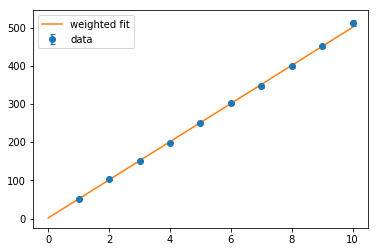

In [15]:
m,c,_,_ = six_i()
plt.errorbar(xs,ys,yerr=ay,fmt='o',capsize=2.5, label = 'data')
plt.plot(np.arange(11),m*np.arange(11)+c, label = 'weighted fit')
plt.legend()
plt.show